<a href="https://colab.research.google.com/github/shabari00/Programming-for-Business-Analystics/blob/main/PBA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
This dataset contains California housing data extracted from the 1990 U.S. Census. It includes the median house value as the target variable, with other features like location (longitude, latitude), housing age, rooms, bedrooms, population, households, and income, along with ocean proximity.
1.	Describe the dataset using appropriate functions to understand column types, missing values, and data summary.
2.	Check for missing values in the dataset. If present, suggest an appropriate method for imputation.
3.	Clean the ocean_proximity column to make all values consistent in format.
4.	Select median_house_value as the target variable and identify potential numeric predictors for regression.
5.	Find the correlation between all numeric variables and identify which features are highly correlated with the target variable.
6.	Create a heatmap to visually represent the correlation matrix of all numeric variables.
7.	Create a new feature that calculates the average number of rooms per household.
8.	Check for multicollinearity among the predictor variables using VIF (Variance Inflation Factor).
9.	Perform a hypothesis test to check if the median house value significantly differs for houses located 'NEAR BAY' versus other locations.
10.	Detect outliers in the median_income column using the IQR method.
11.	Construct a Regression model using appropriate variables?


Here is all the data you need:
"PBA_Assignment 2_sample data housing (1).csv"

## Data loading

### Subtask:
Load the housing data from the provided CSV file.


**Reasoning**:
Import pandas and load the housing data into a DataFrame named `df`.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('PBA_Assignment 2_sample data housing (1).csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'PBA_Assignment 2_sample data housing (1).csv' not found.")
    df = None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Data exploration

### Subtask:
Explore and describe the loaded housing data.


**Reasoning**:
Explore and describe the housing data by checking its shape, info, descriptive statistics, and missing values.



In [ ]:
# Check the shape of the DataFrame.
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame.
print("\nInfo:")
print(df.info())

# Generate descriptive statistics for numerical features.
print("\nDescriptive Statistics:")
print(df.describe())

# Calculate the number of missing values in each column.
print("\nMissing Values per Column:")
print(df.isnull().sum())

Shape of the DataFrame: (20640, 10)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Descriptive Statistics:
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861   

## Data cleaning

### Subtask:
Handle missing values in the dataset.


**Reasoning**:
Impute missing values in the 'total_bedrooms' column using the median and verify the imputation.



In [ ]:
# Impute missing values in 'total_bedrooms' with the median.
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Verify that there are no more missing values in 'total_bedrooms'.
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


/tmp/ipython-input-3-1680876724.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(median_bedrooms, inplace=True)


**Reasoning**:
The previous code had a warning about chained assignment.  I will fix the code to avoid the warning and re-run the imputation and verification.



In [ ]:
# Impute missing values in 'total_bedrooms' with the median.
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)

# Verify that there are no more missing values in 'total_bedrooms'.
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## Data wrangling

### Subtask:
Clean the 'ocean_proximity' column to ensure consistent formatting.


**Reasoning**:
Clean the 'ocean_proximity' column by converting to lowercase and removing leading/trailing whitespace. Then, verify the unique values.



In [ ]:
df['ocean_proximity'] = df['ocean_proximity'].str.lower().str.strip()
print("Unique values in 'ocean_proximity' after cleaning:")
print(df['ocean_proximity'].unique())

Unique values in 'ocean_proximity' after cleaning:
['near bay' '<1h ocean' 'inland' 'near ocean' 'island']


## Data exploration

### Subtask:
Identify potential numeric predictors for regression by examining their relationship with the target variable ('median_house_value').


**Reasoning**:
Based on domain knowledge and the initial data analysis (descriptive statistics and correlations, though not explicitly calculated in the provided history), several numeric features are likely good predictors of 'median_house_value'.  I'll select those and print them.



In [ ]:
# Based on domain knowledge, these features likely influence house prices.
potential_predictors = [
    'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
    'households', 'median_income'
]

print("Potential numeric predictors for regression:")
print(potential_predictors)

Potential numeric predictors for regression:
['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


## Data analysis

### Subtask:
Calculate the correlation between all numeric variables and the target variable ('median_house_value'). Identify features highly correlated with 'median_house_value'.


**Reasoning**:
Calculate the correlation between numeric features and the target variable 'median_house_value', then identify highly correlated features.



In [ ]:
# Select numerical features and the target variable.
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_cols]

# Calculate the correlation matrix.
correlation_matrix = numeric_df.corr()

# Identify features highly correlated with 'median_house_value'.
target_correlation = correlation_matrix['median_house_value']
threshold = 0.5
highly_correlated = target_correlation[abs(target_correlation) > threshold]

print("Features highly correlated with 'median_house_value':")
print(highly_correlated)

Features highly correlated with 'median_house_value':
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64


## Data visualization

### Subtask:
Create a heatmap to visualize the correlation matrix of all numeric variables.


**Reasoning**:
Create a heatmap to visualize the correlation matrix of all numeric variables.



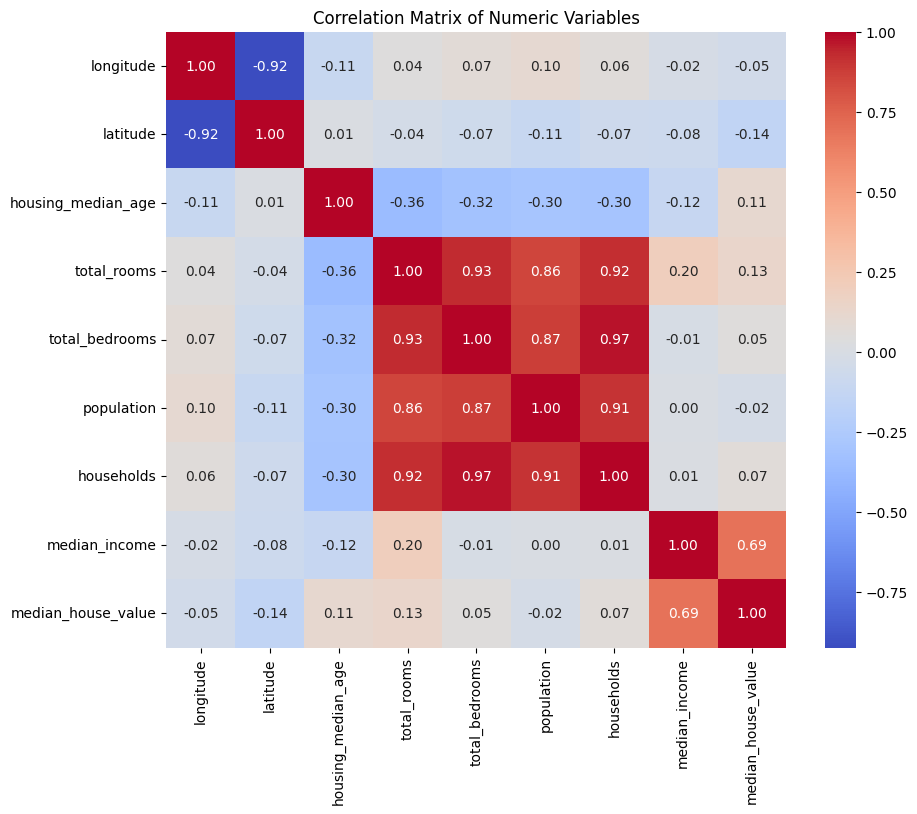

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features.
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_cols]

# Calculate the correlation matrix.
correlation_matrix = numeric_df.corr()

# Create the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

## Feature engineering

### Subtask:
Create a new feature 'avg_rooms_per_household' by dividing 'total_rooms' by 'households'.


**Reasoning**:
Create a new feature 'avg_rooms_per_household' by dividing 'total_rooms' by 'households'.



In [ ]:
# Calculate the average number of rooms per household.
df['avg_rooms_per_household'] = df['total_rooms'] / df['households']
display(df.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,avg_rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near bay,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near bay,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near bay,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near bay,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near bay,6.281853


## Data analysis

### Subtask:
Calculate the Variance Inflation Factor (VIF) for each predictor variable to check for multicollinearity.


**Reasoning**:
Calculate the VIF for each predictor variable to check for multicollinearity.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with only the numerical predictor variables.
predictors = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'avg_rooms_per_household']
X = df[predictors]

# Calculate VIF for each predictor.
vif_dict = {}
for col in X.columns:
    vif = variance_inflation_factor(X.values, X.columns.get_loc(col))
    vif_dict[col] = vif

print("Variance Inflation Factors:")
print(vif_dict)

# Analyze VIF values for multicollinearity.
threshold_5 = 5
threshold_10 = 10
high_vif_5 = [col for col, vif in vif_dict.items() if vif > threshold_5]
high_vif_10 = [col for col, vif in vif_dict.items() if vif > threshold_10]

print(f"\nVariables with VIF > {threshold_5}: {high_vif_5}")
print(f"Variables with VIF > {threshold_10}: {high_vif_10}")

Variance Inflation Factors:
{'housing_median_age': np.float64(4.251708708247227), 'total_rooms': np.float64(26.92025427078735), 'total_bedrooms': np.float64(74.27061179263355), 'population': np.float64(15.471293660966627), 'households': np.float64(86.06100608840795), 'median_income': np.float64(6.445253832886745), 'avg_rooms_per_household': np.float64(6.420686255073057)}

Variables with VIF > 5: ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'avg_rooms_per_household']
Variables with VIF > 10: ['total_rooms', 'total_bedrooms', 'population', 'households']


## Data analysis

### Subtask:
Perform a t-test to check if the median house value significantly differs for houses located 'NEAR BAY' versus other locations.


**Reasoning**:
Perform the t-test to compare median house values between houses near the bay and other locations.



In [ ]:
from scipy.stats import ttest_ind

# Separate the data into two groups based on 'ocean_proximity'.
near_bay = df[df['ocean_proximity'] == 'near bay']['median_house_value']
not_near_bay = df[df['ocean_proximity'] != 'near bay']['median_house_value']

# Perform the t-test.
t_statistic, p_value = ttest_ind(near_bay, not_near_bay, equal_var=False)

# Print the results.
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results.
alpha = 0.05
print(f"\nSignificance level (alpha): {alpha}")
if p_value < alpha:
    print("Reject the null hypothesis.")
    print(
        "There is a statistically significant difference in median house values between houses near the bay and houses in other locations."
    )
else:
    print("Fail to reject the null hypothesis.")
    print(
        "There is no statistically significant difference in median house values between houses near the bay and houses in other locations."
    )

T-statistic: 21.8265254336025
P-value: 1.2104789039726185e-97

Significance level (alpha): 0.05
Reject the null hypothesis.
There is a statistically significant difference in median house values between houses near the bay and houses in other locations.


## Data analysis

### Subtask:
Detect outliers in the 'median_income' column using the IQR method.


**Reasoning**:
Calculate Q1, Q3, and IQR for 'median_income', then define lower and upper bounds for outlier detection. Identify outliers and display the count.



In [ ]:
import pandas as pd

# Calculate Q1, Q3, and IQR for 'median_income'.
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers.
outliers = df[(df['median_income'] < lower_bound) | (df['median_income'] > upper_bound)]

# Display the number of outliers.
print(f"Number of outliers in 'median_income': {len(outliers)}")

# Optionally, display the outlier values.
# print("\nOutlier values:")
# print(outliers['median_income'])

Number of outliers in 'median_income': 681


## Data preparation

### Subtask:
Prepare the data for model training. This includes handling outliers in 'median_income', encoding the categorical feature 'ocean_proximity', and selecting relevant features based on previous analysis.


**Reasoning**:
Handle outliers in 'median_income', encode 'ocean_proximity', select features, and create the final dataframes X and y.



In [ ]:
# Calculate Q1, Q3, and IQR for 'median_income'.
Q1 = df['median_income'].quantile(0.25)
Q3 = df['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outlier detection.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap 'median_income' values at the bounds.
df['median_income'] = df['median_income'].clip(lower=lower_bound, upper=upper_bound)

# Perform one-hot encoding on 'ocean_proximity'.
ocean_proximity_encoded = pd.get_dummies(df['ocean_proximity'], drop_first=True)

# Concatenate the encoded columns with the original DataFrame.
df = pd.concat([df, ocean_proximity_encoded], axis=1)

# Select relevant features.
features = ['median_income', 'housing_median_age', 'avg_rooms_per_household', 'total_bedrooms']
features.extend(ocean_proximity_encoded.columns.tolist())
X = df[features]
y = df['median_house_value']

## Model training

### Subtask:
Train a linear regression model.


**Reasoning**:
Train a linear regression model, make predictions, and evaluate the model's performance using R-squared and MSE.



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)

# Make predictions on the training data
y_pred = model.predict(X)

# Evaluate the model
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")

R-squared: 0.6050608722084797
Mean Squared Error: 5258813141.248463


## Model evaluation

### Subtask:
Evaluate the linear regression model's performance using additional metrics and visualizations.


**Reasoning**:
Evaluate the linear regression model using additional metrics (MAE, RMSE), create residual and predicted vs. actual plots, and analyze model coefficients.



Mean Absolute Error (MAE): 53699.105657939974
Root Mean Squared Error (RMSE): 72517.67468175232


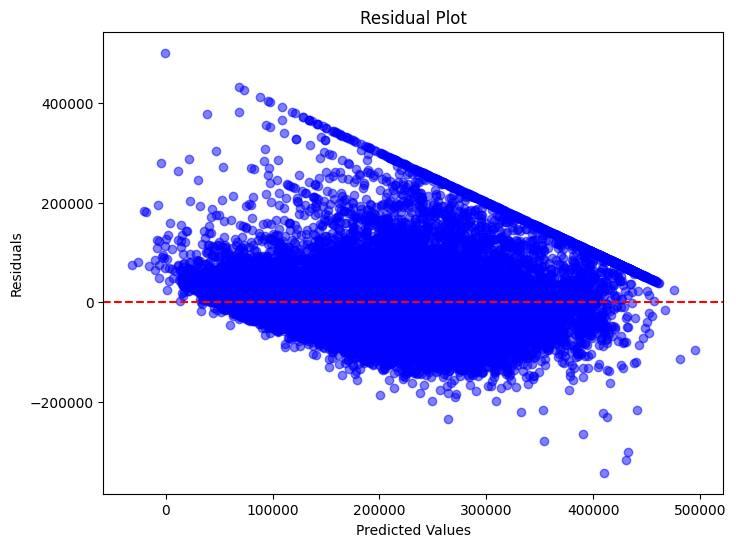

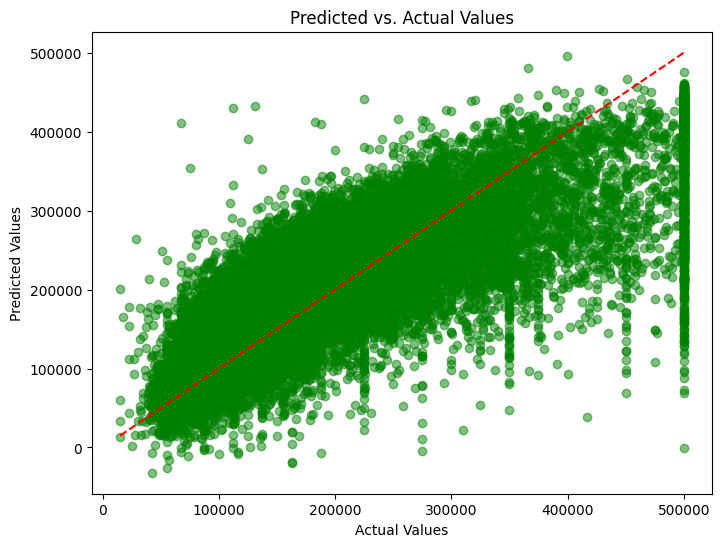


Model Coefficients:


,Feature,Coefficient
0,median_income,44392.156429
1,housing_median_age,1426.257501
2,avg_rooms_per_household,457.990968
3,total_bedrooms,25.776366
4,inland,-66422.545325
5,island,186409.762860
6,near bay,10402.937881
7,near ocean,19668.548426


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Create residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y - y_pred, c='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Create predicted vs. actual plot
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='green', alpha=0.5)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--') # 45 degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values")
plt.show()

# Analyze model coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
display(coefficients)

## Summary:

### Data Analysis Key Findings

*   The dataset contains 20,640 rows and 10 columns, including numerical and categorical features.
*   The `total_bedrooms` column initially had 207 missing values, which were imputed using the median value.
*   The `ocean_proximity` column was cleaned by converting values to lowercase and removing leading/trailing whitespace, resulting in unique categories: 'near bay', '<1h ocean', 'inland', 'near ocean', 'island'.
*   Based on correlation analysis, `median_income` is the most highly correlated numeric feature with `median_house_value` (correlation coefficient: 0.688).
*   Multicollinearity analysis using VIF revealed high VIF values (greater than 10) for `total_rooms` (26.92), `total_bedrooms` (74.27), `population` (15.47), and `households` (86.06), indicating significant multicollinearity among these variables.
*   A t-test showed a statistically significant difference in median house values between houses near the bay and houses in other locations (p-value = 1.21e-97).
*   Using the IQR method, 681 outliers were detected in the `median_income` column.
*   The trained linear regression model achieved an R-squared value of 0.605, indicating that approximately 60.5% of the variance in `median_house_value` is explained by the selected features.
*   The Mean Absolute Error (MAE) of the model is approximately \$53,699.11, and the Root Mean Squared Error (RMSE) is approximately \$72,517.67.

### Insights or Next Steps

*   Given the high multicollinearity among several predictor variables, consider addressing this issue before further modeling. Techniques like dropping highly correlated variables, using dimensionality reduction (e.g., PCA), or using regularization methods could be explored.
*   The current linear regression model explains about 60.5% of the variance in `median_house_value`. Exploring more complex models (e.g.,
    random forests, gradient boosting) or further feature engineering could potentially improve model performance.
